In [16]:
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
import numpy as np

data = Dataset(r'med-cmcc-cur-an-fc-h_1637664022632.nc')  # MEDSEA_ANALYSISFORECAST_PHY_006_013 (physics model)
data = xr.open_dataset(r'med-hcmr-wav-rean-h_1637676759192.nc') 

dat2 = xr.open_dataset(r'med-cmcc-cur-an-fc-h_1637664022632.nc')
dat3 = xr.open_dataset('MED-MFC_006_017_coordinates.nc')


<xarray.Dataset>
Dimensions:  (depth: 1, time: 24, lat: 380, lon: 1287)
Coordinates:
  * depth    (depth) float32 1.018
  * lon      (lon) float32 -17.29 -17.25 -17.21 -17.17 ... 36.21 36.25 36.29
  * time     (time) datetime64[ns] 2021-11-23T00:30:00 ... 2021-11-23T23:30:00
  * lat      (lat) float32 30.19 30.23 30.27 30.31 ... 45.85 45.9 45.94 45.98
Data variables:
    vo       (time, depth, lat, lon) float32 ...
    uo       (time, depth, lat, lon) float32 ...
Attributes:
    title:                           Horizontal Velocity (3D) - Hourly Mean
    FROM_ORIGINAL_FILE__field_type:  hourly_mean_centered_at_time_field
    source:                          MFS EAS6
    institution:                     Centro Euro-Mediterraneo sui Cambiamenti...
    contact:                         servicedesk.cmems@mercator-ocean.eu
    references:                      Clementi, E., Aydogdu, A., Goglio, A. C....
    comment:                         Please check in CMEMS catalogue the INFO...
    Conventions:                     CF-1.0
    bulletin_date:                   20211122
    bulletin_type:                   forecast
    _CoordSysBuilder:                ucar.nc2.dataset.conv.CF1Convention
    history:                         Data extracted from dataset http://local...

In [8]:
lats = data.variables['lat'][:]
lons = data.variables['lon'][:]
time = data.variables['time'][:]
u0 = data.variables['uo'][:,0,:,:] # I care of sea current at surface, depth=0
v0 = data.variables['vo'][:,0,:,:]
speed = np.hypot(u0, v0)

<ipython-input-8-323c83ee1a3e>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lats = data.variables['lat'][:]
<ipython-input-8-323c83ee1a3e>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lons = data.variables['lon'][:]
<ipython-input-8-323c83ee1a3e>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this 

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
mp = Basemap(projection = 'merc', 
             llcrnrlon=-5.42,  # 4.125,
             llcrnrlat=35.32,  # 33.1875,
             urcrnrlon=25.1307,  # 20.291667938,
             urcrnrlat=45.5488,  # 45.97916,
             resolution='f')

<ipython-input-10-5737200ebd42>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c_scheme = mp.pcolor(x, y, speed[0], cmap='jet')
<ipython-input-10-5737200ebd42>:25: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  mp.quiver(x[points], y[points], u0[0][points], v0[0][points])


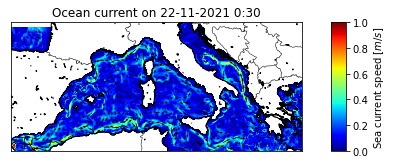

In [10]:
lon, lat = np.meshgrid(lons, lats)
x,y = mp(lon, lat)

yy = np.arange(0, y.shape[0], 10)
xx = np.arange(0, x.shape[1], 10)
points = np.meshgrid(yy, xx)

"""hour = 0
hours = np.arange(0, 24)
for i in hours:
    c_scheme = mp.pcolor(x, y, speed[i], cmap='jet')
    mp.quiver(x[points], y[points], u0[i][points], v0[i][points])
    mp.drawcoastlines()
    mp.drawstates()
    mp.drawcountries()
    cbar = mp.colorbar(c_scheme, location='right', pad='10%')
    cbar.set_label('Sea current speed $[m/s]$')
    plt.clim(0, 1)
    plt.title('Sea current speed on 22-11-2021 ' + str(hour) + ':30')   # plt.title('Ocean current on 22-11-2021')
    plt.savefig(r'.\Images' + '\\current' + str(hour) + '.jpg', dpi=500)
    hour = i+1
    plt.clf()"""

c_scheme = mp.pcolor(x, y, speed[0], cmap='jet')
mp.quiver(x[points], y[points], u0[0][points], v0[0][points])
mp.drawcoastlines()
mp.drawstates()
mp.drawcountries()
cbar = mp.colorbar(c_scheme, location='right', pad='10%')
cbar.set_label('Sea current speed $[m/s]$')
plt.clim(0, 1)
plt.title('Ocean current on 22-11-2021 0:30')
plt.show()